In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pytrends.request import TrendReq
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

# Setup Pytrends

In [94]:
pytrends = TrendReq(hl = "en-US", tz = 360)
keyword = "cloud computing"

# Data Request

In [95]:
pytrends.build_payload([keyword], cat= 0, timeframe = "today 12-m", geo = '', gprop='')

# country wise intrest

In [96]:
region_data = pytrends.interest_by_region()
region_data = region_data.sort_values(by = keyword, ascending = False).head(15)

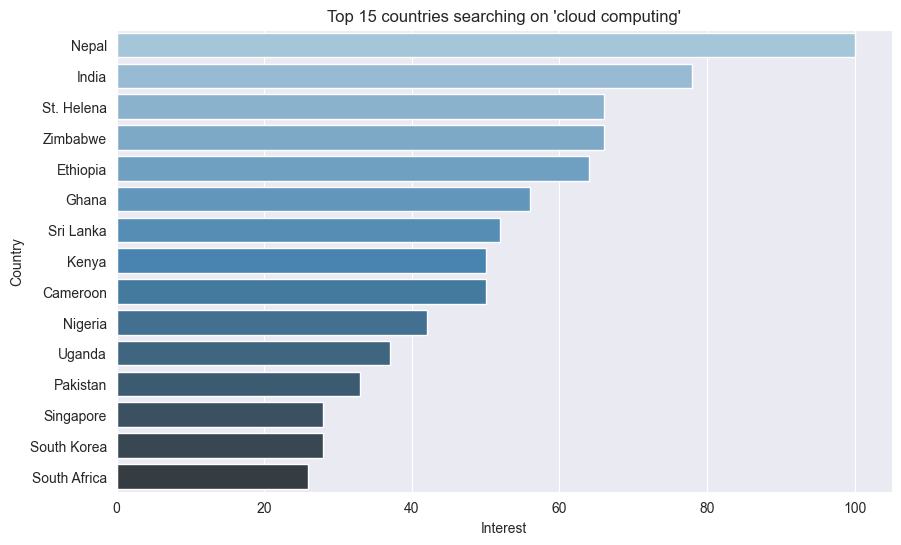

In [97]:
plt.figure(figsize= (10,6))
sns.barplot(x = region_data[keyword] , y = region_data.index , palette = "Blues_d")
plt.title(f"Top 15 countries searching on '{keyword}'")
plt.xlabel("Interest")
plt.ylabel("Country")
plt.show()

# Wolrd Map

In [98]:
region_data = region_data.reset_index()
fig = px.choropleth(region_data,
                    locations = 'geoName',
                    locationmode = 'country names',
                    color = keyword,
                    title = f"Searching intrest for '{keyword}' by country",
                    color_continuous_scale = "Blues",
)
fig.show()

# Time Wise Intrest

In [99]:
time_df = pytrends.interest_over_time()


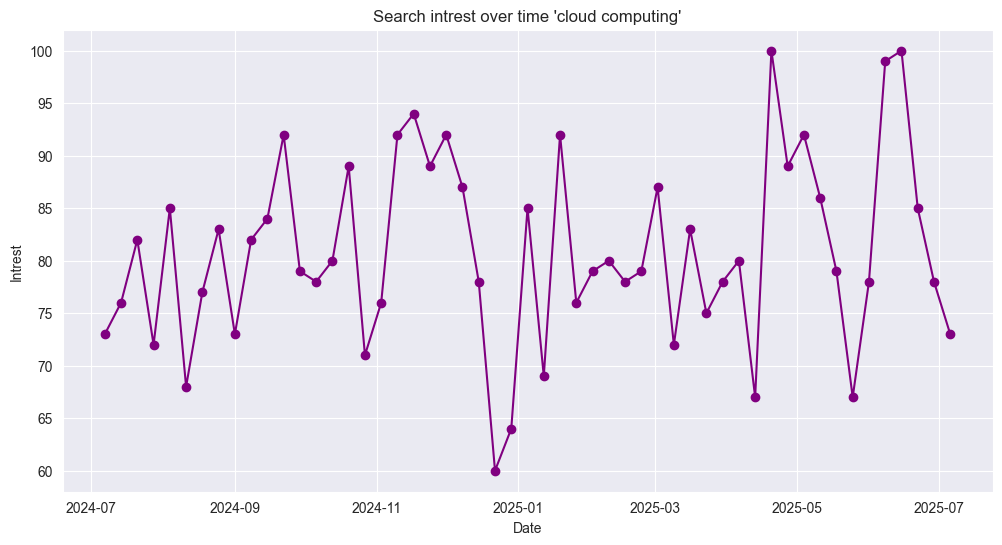

In [100]:
plt.figure(figsize= (12,6))
plt.plot(time_df.index, time_df[keyword], marker = 'o', color = 'purple')
plt.title(f"Search intrest over time '{keyword}'")
plt.xlabel("Date")
plt.ylabel("Intrest")
plt.grid(True)
plt.show()

# Multiple Keywords Compare

In [101]:
kw_list = [keyword, "data science" , "machine learning"]
pytrends.build_payload(kw_list, cat=0,  timeframe = "today 12-m", geo = '', gprop='')


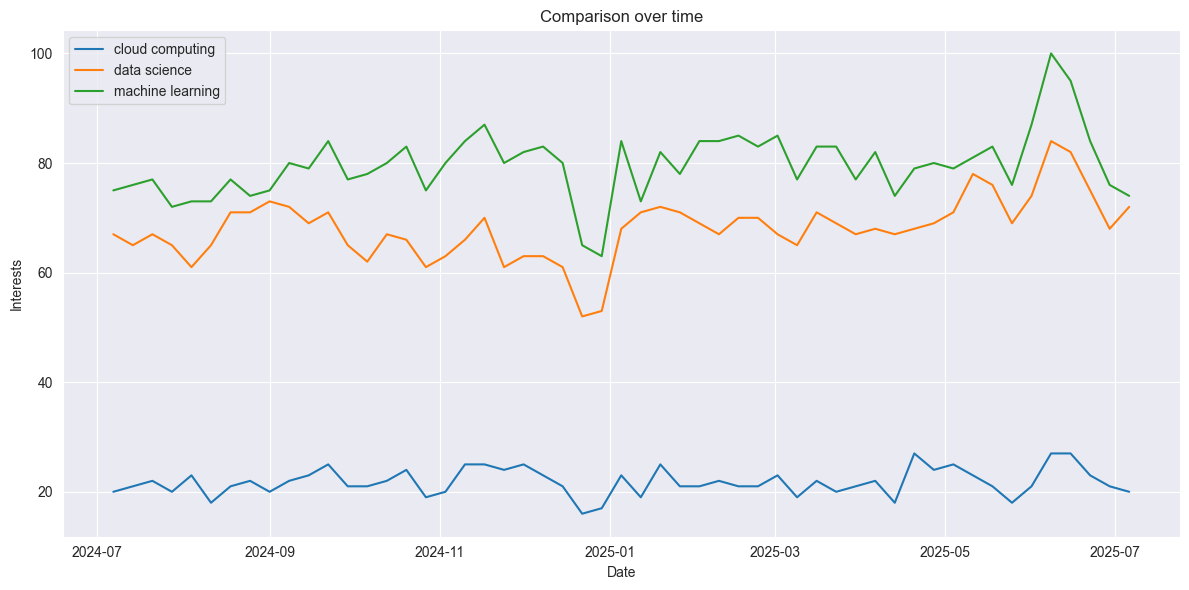

In [102]:
compare_df = pytrends.interest_over_time()
plt.figure(figsize= (12,6))

for kw in kw_list:
    plt.plot(compare_df.index, compare_df[kw],label=kw)

plt.title("Comparison over time")
plt.xlabel("Date")
plt.ylabel("Interests")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()